# Project HR
Predict attrition of valuable employees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Preprocessing

In [5]:
import os
#os.chdir("..")
#os.getcwd()

'C:\\Users\\ejvpaba\\Desktop\\Python\\ML_Practice\\The Complete Machine Learning Course'

In [6]:
df = pd.read_csv("Data\HR\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.shape

(1470, 35)

In [8]:
#Remove useless columns
df.pop('EmployeeCount');
df.pop('EmployeeNumber');
df.pop('Over18');
df.pop('StandardHours');

In [9]:
df.shape

(1470, 31)

In [10]:
y = df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

**Binarize y**

In [11]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [13]:
y = le.fit_transform(y)

In [14]:
y.shape

(1470, 1)

**Tidy up X**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [17]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [18]:
#Change objects to dummy variables
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [19]:
ind_Department.head()

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [20]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_Gender, ind_JobRole, ind_MaritalStatus, ind_OverTime], axis=1)

In [21]:
df1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
df1.shape

(1470, 22)

In [23]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,...,3,3,0,8,2,2,7,7,3,6
6,59,1324,3,3,3,81,4,1,1,2670,...,4,1,3,12,3,2,1,0,0,0
7,30,1358,24,1,4,67,3,1,3,2693,...,4,2,1,1,2,3,1,0,0,0
8,38,216,23,3,4,44,2,3,3,9526,...,4,2,0,10,2,3,9,7,1,8
9,36,1299,27,3,3,94,3,2,3,5237,...,3,2,2,17,3,2,7,7,7,7


In [24]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_Gender, ind_JobRole, ind_MaritalStatus, ind_OverTime,
                 df.select_dtypes(['int64'])], axis=1)

In [25]:
df1.shape

(1470, 45)

***
## Modelling

### Decision Tree
Our first attempt from the last go-around

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [27]:
from sklearn.tree import DecisionTreeClassifier

**Base Classifier with no adjusted parameters**

In [28]:
clf = DecisionTreeClassifier(random_state=42)

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [32]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       177

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [33]:
confusion_matrix(y_train, clf.predict(X_train))

array([[925,   0],
       [  0, 177]], dtype=int64)

100% for everything... definitely overfitting. Show this in test set.

In [34]:
accuracy_score(y_test, clf.predict(X_test))

0.7608695652173914

In [35]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       308
           1       0.29      0.33      0.31        60

   micro avg       0.76      0.76      0.76       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.77      0.76      0.77       368



In [36]:
confusion_matrix(y_test, clf.predict(X_test))

array([[260,  48],
       [ 40,  20]], dtype=int64)

Exactly as we thought, did not do well on the test dataset because the model was overfit.

Next steps would be to adjust the hyperparameters and grid-search to find optimal.

### Bagging

In [44]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [45]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                           bootstrap=True, n_jobs=-1, random_state=42)

In [46]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [47]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report, and confusion matrix of classifier
    '''
    if train:
        '''
        Training Performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report:\n {} \n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix:  \n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report:\n {} \n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix:  \n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [48]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       177

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix:  
 [[925   0]
 [  0 177]] 

Average Accuracy: 	 0.8584
Accuracy SD 		 0.0125


In [49]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8533

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       308
           1       0.69      0.18      0.29        60

   micro avg       0.85      0.85      0.85       368
   macro avg       0.77      0.58      0.60       368
weighted avg       0.83      0.85      0.82       368
 

Confusion Matrix:  
 [[303   5]
 [ 49  11]] 



Better test results, ~85%

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_clf = RandomForestClassifier()

In [52]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9764

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       925
           1       1.00      0.85      0.92       177

   micro avg       0.98      0.98      0.98      1102
   macro avg       0.99      0.93      0.95      1102
weighted avg       0.98      0.98      0.98      1102
 

Confusion Matrix:  
 [[925   0]
 [ 26 151]] 

Average Accuracy: 	 0.8584
Accuracy SD 		 0.0117
Test Result:

accuracy score: 0.8478

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       308
           1       0.64      0.15      0.24        60

   micro avg       0.85      0.85      0.85       368
   macro avg       0.75      0.57      0.58       368
weighted avg       0.82      0.85      0.81       368
 

Confusion Matrix:  
 [[303   5]
 [ 51   9]] 



In [55]:
import seaborn as sns

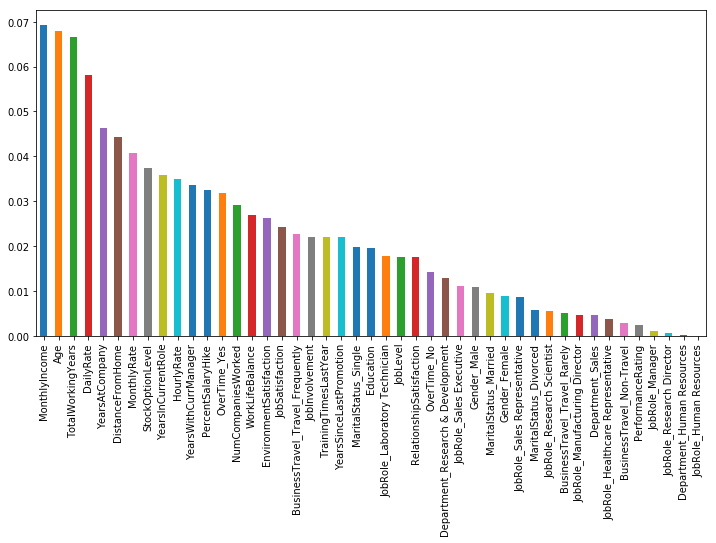

In [56]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

### AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
ada_clf = AdaBoostClassifier()

In [59]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [61]:
print_score(ada_clf, X_train, y_train.ravel(), X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8947

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       925
           1       0.78      0.48      0.59       177

   micro avg       0.89      0.89      0.89      1102
   macro avg       0.84      0.73      0.77      1102
weighted avg       0.89      0.89      0.88      1102
 

Confusion Matrix:  
 [[901  24]
 [ 92  85]] 

Average Accuracy: 	 0.8666
Accuracy SD 		 0.0196
Test Result:

accuracy score: 0.8696

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       308
           1       0.75      0.30      0.43        60

   micro avg       0.87      0.87      0.87       368
   macro avg       0.81      0.64      0.68       368
weighted avg       0.86      0.87      0.85       368
 

Confusion Matrix:  
 [[302   6]
 [ 42  18]] 



Best model yet, ~87% test accuracy. Not bad for a base model.

### AdaBoost + Random Forest

In [62]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [63]:
print_score(ada_clf, X_train, y_train.ravel(), X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       925
           1       1.00      1.00      1.00       177

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 

Confusion Matrix:  
 [[925   0]
 [  0 177]] 

Average Accuracy: 	 0.8548
Accuracy SD 		 0.0097
Test Result:

accuracy score: 0.8533

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.71      0.17      0.27        60

   micro avg       0.85      0.85      0.85       368
   macro avg       0.79      0.58      0.59       368
weighted avg       0.84      0.85      0.81       368
 

Confusion Matrix:  
 [[304   4]
 [ 50  10]] 



### Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
print_score(gbc_clf, X_train, y_train.ravel(), X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9601

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       925
           1       0.99      0.76      0.86       177

   micro avg       0.96      0.96      0.96      1102
   macro avg       0.97      0.88      0.92      1102
weighted avg       0.96      0.96      0.96      1102
 

Confusion Matrix:  
 [[924   1]
 [ 43 134]] 

Average Accuracy: 	 0.8565
Accuracy SD 		 0.0195
Test Result:

accuracy score: 0.8614

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       308
           1       0.70      0.27      0.39        60

   micro avg       0.86      0.86      0.86       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.84      0.86      0.83       368
 

Confusion Matrix:  
 [[301   7]
 [ 44  16]] 



### XGBoost

In [68]:
import xgboost as xgb

In [69]:
xgb_clf = xgb.XGBClassifier()

In [71]:
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [72]:
print_score(xgb_clf, X_train, y_train.ravel(), X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9410

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       925
           1       0.98      0.64      0.78       177

   micro avg       0.94      0.94      0.94      1102
   macro avg       0.96      0.82      0.87      1102
weighted avg       0.94      0.94      0.94      1102
 

Confusion Matrix:  
 [[923   2]
 [ 63 114]] 

Average Accuracy: 	 0.8602
Accuracy SD 		 0.0234
Test Result:

accuracy score: 0.8587

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       308
           1       0.70      0.23      0.35        60

   micro avg       0.86      0.86      0.86       368
   macro avg       0.78      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368
 

Confusion Matrix:  
 [[302   6]
 [ 46  14]] 



**Next step is to tune hyperparameters to find best model**